<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/pract_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Function to load CSV file using Pandas
import pandas as pd
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Finding the optimal k using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares

for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to cluster center

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal k")
plt.grid()
plt.show()


NameError: name 'X_scaled' is not defined

Saving Mall_Customers.csv to Mall_Customers (1).csv


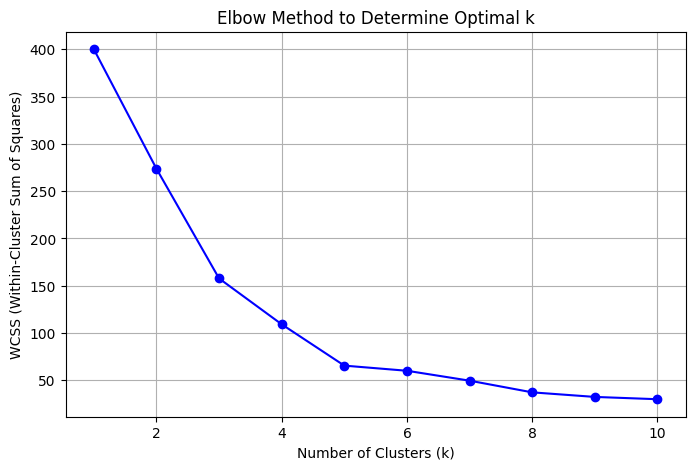

In [4]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Function to load CSV file using Pandas
import pandas as pd
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

# Select the features for clustering (e.g., 'Annual Income' and 'Spending Score')
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assign the scaled data to X_scaled

# Finding the optimal k using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares

for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)  # Now X_scaled is defined
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to cluster center

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal k")
plt.grid()
plt.show()

In [6]:
# Choose the optimal k based on the Elbow Method (adjust manually after looking at the plot)
optimal_k = 4  # Example value; adjust based on your elbow method result

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
dataset["Cluster"] = kmeans.fit_predict(X_scaled) # Changed df_filled to dataset

# Compute silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(X_scaled, dataset["Cluster"]) # Changed df_filled to dataset
print(f"\nSilhouette Score for k={optimal_k}: {silhouette_avg:.2f}")


Silhouette Score for k=4: 0.49


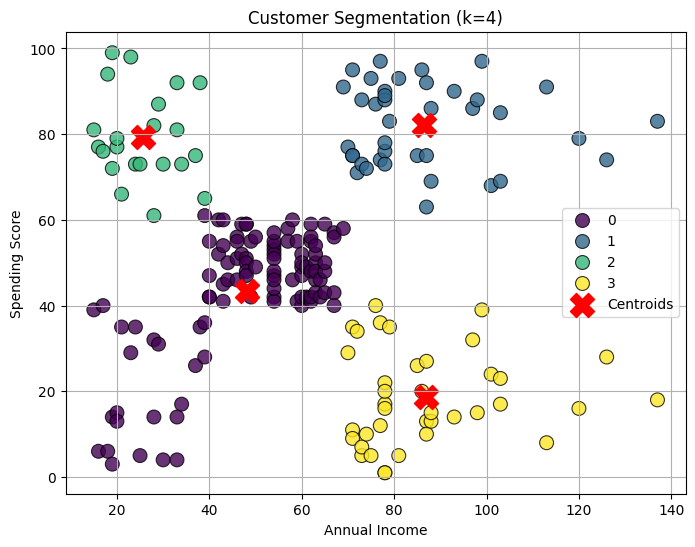

In [8]:
plt.figure(figsize=(8, 6))

# Scatter plot with cluster assignments
# Changed 'df_filled' to 'dataset' to use the correct DataFrame
sns.scatterplot(
    x=dataset["Annual Income (k$)"],  # Also changed column name to match the DataFrame
    y=dataset["Spending Score (1-100)"],  # Also changed column name to match the DataFrame
    hue=dataset["Cluster"],
    palette="viridis",
    s=100,
    alpha=0.8,
    edgecolor="black"
)

# Plot cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Convert centers back to original scale
# Accessing the cluster centers correctly (using index 0 and 1)
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="X", s=300, label="Centroids")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title(f"Customer Segmentation (k={optimal_k})")
plt.legend()
plt.grid()
plt.show()